# PROJECT "Name and Small introduction TODO"

Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from random import randint
import numpy as np
from shapely.ops import nearest_points
import folium


ModuleNotFoundError: No module named 'folium'

Ignoriering warning about the formating.
These are not important for this project.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Implementation

Setting a fixed seed to reproduce the results.

In [3]:
np.random.seed(42)

Creating a function to get some random weights or just 1. This allows to create a random representation of population, or rating every edge just by the distance.

In [4]:
def getWeights(rng=True, amt=20, minW=0.5):
    if rng:
        return np.random.uniform(minW, 1.0, amt)
    else:
        return np.random.uniform(1.0, 1.0, amt)

This is a implementation of a graph structure with a function to calculate the minimal spanning tree. (https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/)

In [5]:

# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph
 
from collections import defaultdict
 
# Class to represent a graph
 
 
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary
        self.result = []
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        self.result = []  # This will store the resultant MST
         
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in 
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph, 
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't
            #  cause cycle, include it in result 
            #  and increment the indexof result 
            # for next edge
            if x != y:
                e = e + 1
                self.result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        print("Edges in the constructed MST")
        for u, v, weight in self.result:
            minimumCost += weight
            print("%d -- %d == %f" % (u, v, weight))
        print("Minimum Spanning Tree" , minimumCost)
 
# Driver code


## District Boundry

In [6]:
#read GeoJSON data into a DataFrame
District_Boundary_df = gpd.read_file('GeoJSON/District_Boundary.geojson')
district_Boundary = District_Boundary_df.loc[:, ["OBJECTID", "D_Name", "geometry"]].copy()
District_Boundary_df.head()

,OBJECTID_1,OBJECTID,Name,area,D_Name,Shape_Leng,area_1,Population,X,Y,Shape_Length,Shape_Area,geometry
0,1,1,????? ?????,781,D 4,14203.805827,7.810276,54076.0,67.0830,36.6987,14203.805827,7.810276e+06,"POLYGON ((67.08671 36.71374, 67.08629 36.71379..."
1,2,2,????? ???,1787,D10,22059.310596,17.870776,74805.0,67.1577,36.6923,22059.310596,1.787078e+07,"POLYGON ((67.14305 36.66304, 67.14350 36.66303..."
2,3,3,????? ???,1039,D 1,19416.391006,10.390477,50007.0,67.1244,36.6730,19416.391006,1.039048e+07,"POLYGON ((67.12092 36.71066, 67.12091 36.71066..."
3,4,4,????? ???,679,D 6,16661.136190,6.786827,42399.0,67.1354,36.6879,16661.136190,6.786827e+06,"POLYGON ((67.14305 36.66304, 67.14308 36.66321..."
4,5,5,????? ????,947,D 7,16541.095321,9.474520,82026.0,67.1432,36.7290,16541.095321,9.474520e+06,"POLYGON ((67.16720 36.72269, 67.16717 36.72280..."


Display the boundries on the map for better visualization

In [7]:
center_point = district_Boundary.centroid[0]
dist_center = [center_point.y , center_point.x]
dist_map1 = folium.Map(location = dist_center)
folium.GeoJson(district_Boundary.geometry).add_to(dist_map1)
display(dist_map1)

Text(0.5, 269.07326732244206, 'Longitude')

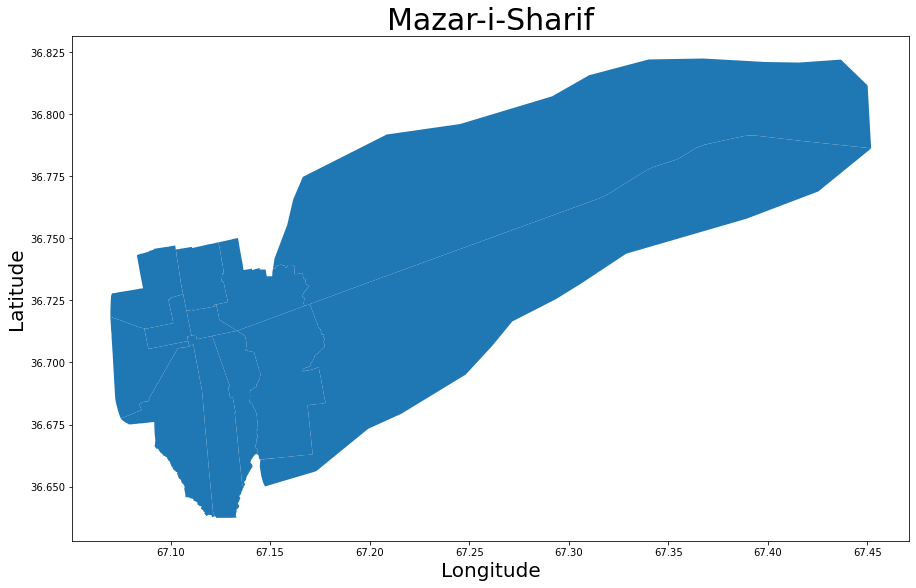

In [8]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Text(0.5, 269.0817668472561, 'Longitude')

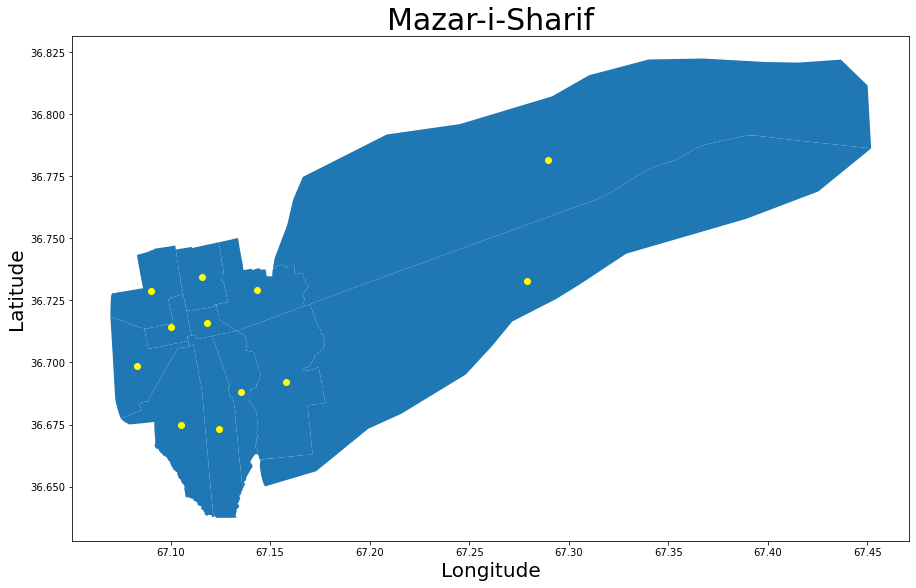

In [9]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [10]:
## calculating the edges, including district weights 
import math

edges = []
calced_edges = []

district_weights = getWeights(False, len(district_Boundary.centroid))
for i in range(len(district_Boundary.centroid)):
    for j in range(len(district_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((district_Boundary.centroid[i].x - district_Boundary.centroid[j].x)**2 + (district_Boundary.centroid[i].y - district_Boundary.centroid[j].y)**2)*(district_weights[i]+district_weights[j])
            edges.append([i,j, dist])
            

In [11]:
#edges

g = Graph(len(district_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

Edges in the constructed MST
8 -- 9 == 0.035300
6 -- 9 == 0.036227
2 -- 3 == 0.037076
5 -- 6 == 0.037892
2 -- 7 == 0.038414
1 -- 3 == 0.045510
0 -- 9 == 0.046710
4 -- 5 == 0.056191
0 -- 7 == 0.065321
10 -- 11 == 0.099884
1 -- 11 == 0.255689
Minimum Spanning Tree 0.754213037602502


Text(0.5, 319.22884360284377, 'Longitude')

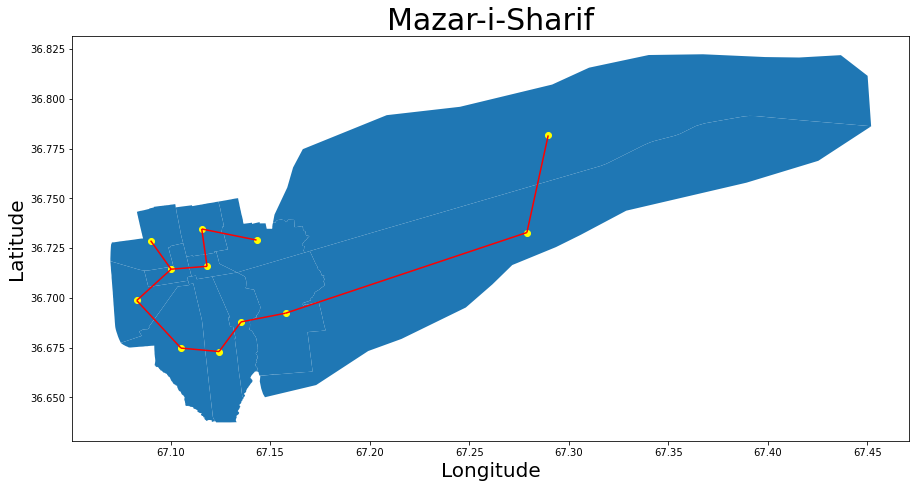

In [12]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([district_Boundary.centroid[e[0]],district_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='red')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [13]:
## calculating the edges, including district weights 
import math

edges = []
calced_edges = []

district_weights = getWeights(True, len(district_Boundary.centroid), 0.1)
for i in range(len(district_Boundary.centroid)):
    for j in range(len(district_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((district_Boundary.centroid[i].x - district_Boundary.centroid[j].x)**2 + (district_Boundary.centroid[i].y - district_Boundary.centroid[j].y)**2)/(district_weights[i]+district_weights[j])
            edges.append([i,j, dist])

In [14]:
#edges

g = Graph(len(district_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

Edges in the constructed MST
5 -- 6 == 0.017856
8 -- 9 == 0.020144
0 -- 8 == 0.020574
5 -- 8 == 0.021535
0 -- 7 == 0.026963
4 -- 5 == 0.029696
2 -- 7 == 0.030695
2 -- 3 == 0.035063
1 -- 3 == 0.040914
10 -- 11 == 0.063006
0 -- 11 == 0.155554
Minimum Spanning Tree 0.46199867357271635


Text(0.5, 319.22884360284377, 'Longitude')

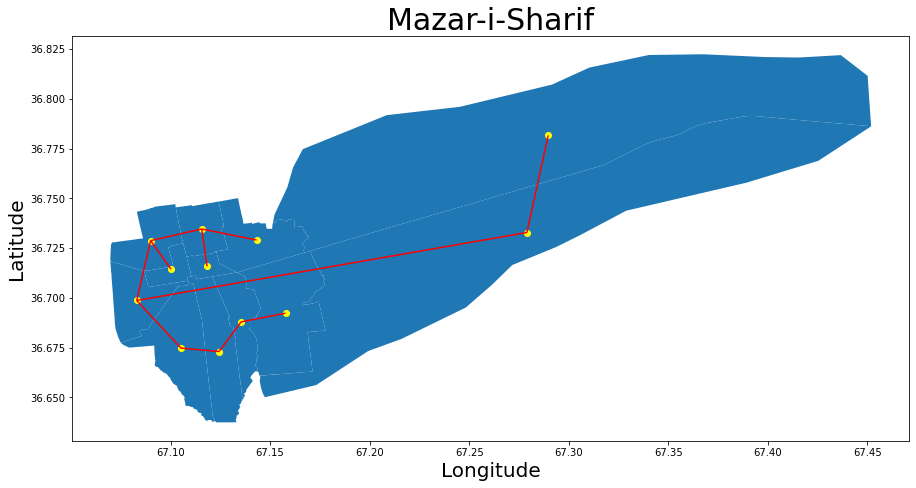

In [15]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([district_Boundary.centroid[e[0]],district_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='red')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [16]:
Gozar_Boundary_df = gpd.read_file('GeoJSON/Gozar_Boundary.geojson')
Gozar_Boundary = Gozar_Boundary_df.loc[:, ["OBJECTID", "D_Name", "geometry"]].copy()
Gozar_Boundary_df.head()

,OBJECTID_1,OBJECTID,Name,area,D_Name,Shape_Leng,area_1,Shape_Length,Shape_Area,geometry
0,1,1,08,781,D 4,14203.805827,7.810276,5981.302061,1.831722e+06,"POLYGON ((67.07186 36.68994, 67.07186 36.68991..."
1,2,2,24,1787,D 10,22059.310596,17.870776,3980.992729,7.759856e+05,"POLYGON ((67.15599 36.67144, 67.15585 36.67272..."
2,3,3,12,1039,D 1,19416.391006,10.390477,3824.092744,6.830197e+05,"POLYGON ((67.13445 36.64220, 67.13441 36.64235..."
3,4,4,08,679,D 6,16661.136190,6.786827,5268.445794,1.070052e+06,"POLYGON ((67.13341 36.66749, 67.13369 36.66472..."
4,5,5,01,947,D 7,16541.095321,9.474520,3933.616562,8.012730e+05,"POLYGON ((67.14091 36.71496, 67.14064 36.71587..."


In [17]:
center_point = Gozar_Boundary.centroid[0]
dist_center = [center_point.y , center_point.x]
dist_map1 = folium.Map(location = dist_center)
folium.GeoJson(Gozar_Boundary.geometry).add_to(dist_map1)
#folium.GeoJson(Garage_locations.centroid).add_to(dist_map1)
display(dist_map1)

Text(0.5, 114.0, 'Longitude')

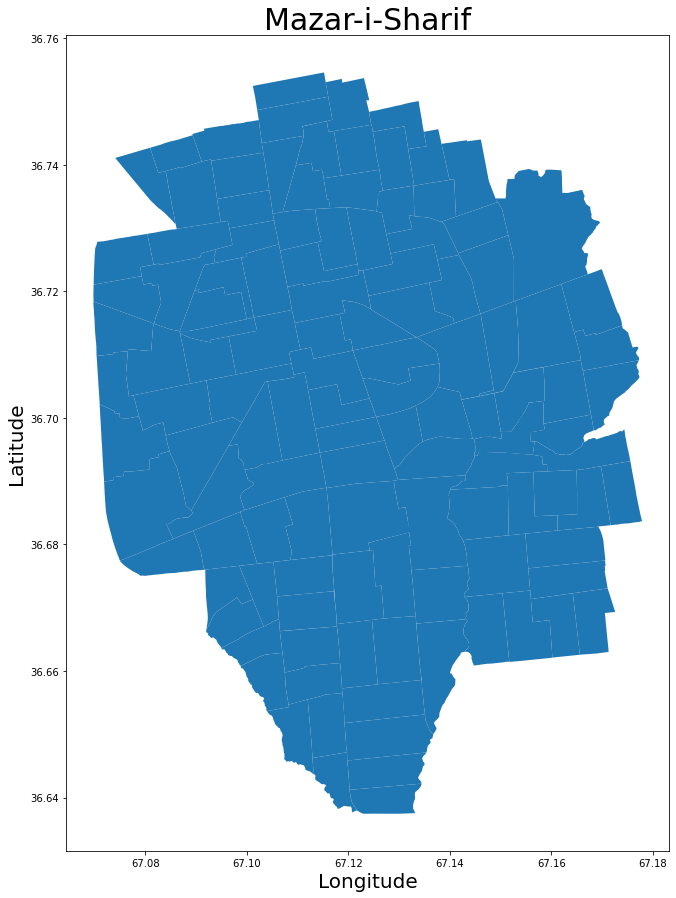

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Text(0.5, 114.0, 'Longitude')

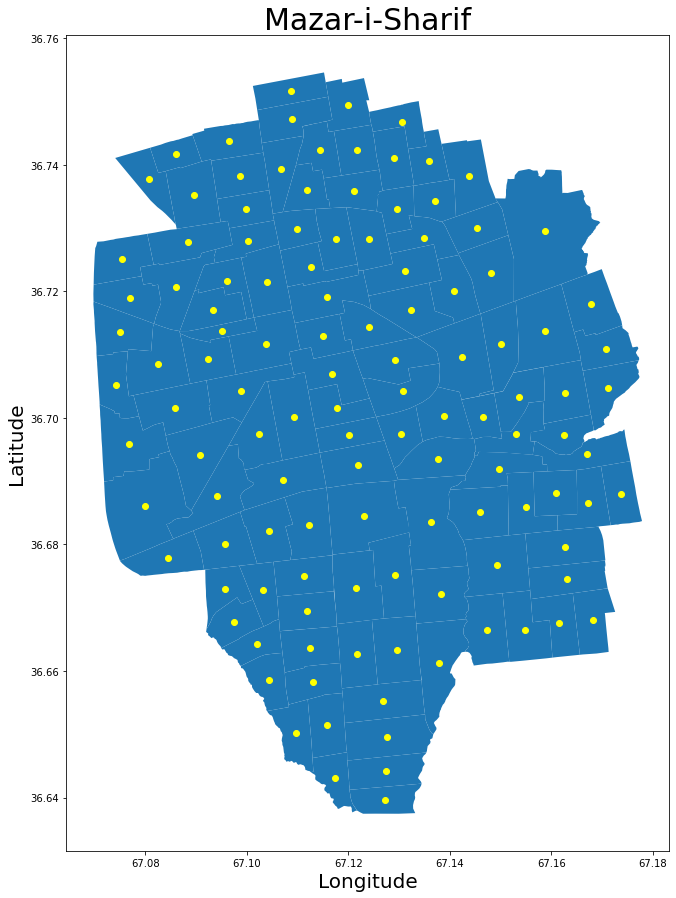

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'yellow', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [20]:
num_garage = 4

In [21]:
garage_loc_index = np.random.choice(len(Gozar_Boundary), num_garage, replace=False)
print (garage_loc_index)

[75 18 81 85]


In [22]:
Garage_locations = Gozar_Boundary.loc[garage_loc_index,["D_Name", "geometry"]].copy()
Garage_locations=Garage_locations.rename(columns={"Centroid": "Location"})

In [23]:
Garage_locations

,D_Name,geometry
75,D 5,"POLYGON ((67.09158 36.67600, 67.09092 36.67890..."
18,D 10,"POLYGON ((67.15837 36.70267, 67.15836 36.70270..."
81,D 5,"POLYGON ((67.10331 36.66704, 67.10458 36.66750..."
85,D 5,"POLYGON ((67.11271 36.64916, 67.11200 36.65549..."


Text(0.5, 114.0, 'Longitude')

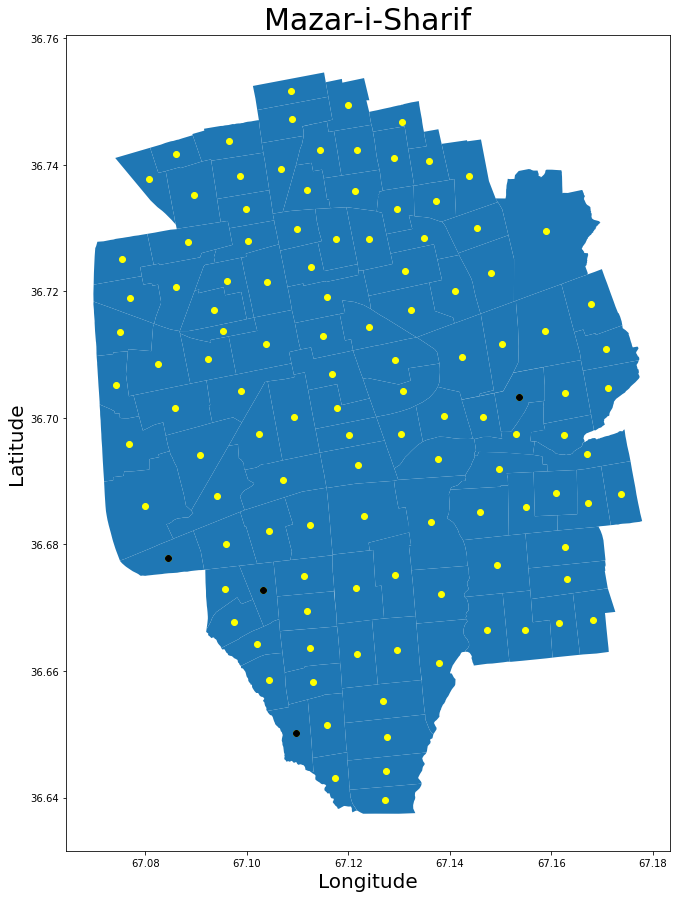

In [24]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'yellow', ax=ax)
Garage_locations.centroid.plot(color = 'black', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [25]:
Garage_location_pts= Garage_locations.centroid.unary_union
def nearest_Garage(point, pts= Garage_location_pts):
    nearest = nearest_points(point, pts)[1]
    return [Garage_locations.iloc[x].D_Name for x in range(num_garage) if Garage_locations.iloc[x].Location == nearest][0]




In [26]:
#Gozar_Boundary['Nearest_Garage'] = Gozar_Boundary.apply(lambda row: nearest_Garage(row.Centroid), axis=1)

In [27]:
Gozar_Boundary.head()

,OBJECTID,D_Name,geometry
0,1,D 4,"POLYGON ((67.07186 36.68994, 67.07186 36.68991..."
1,2,D 10,"POLYGON ((67.15599 36.67144, 67.15585 36.67272..."
2,3,D 1,"POLYGON ((67.13445 36.64220, 67.13441 36.64235..."
3,4,D 6,"POLYGON ((67.13341 36.66749, 67.13369 36.66472..."
4,5,D 7,"POLYGON ((67.14091 36.71496, 67.14064 36.71587..."


In [28]:
Disposal_Location_df = gpd.read_file('GeoJSON/Disposal_Location.geojson')
#type(District_Boundary)
Disposal_Location_df.head()

,OBJECTID,X,Y,Pl_Name,geometry
0,1,67.096813,36.751537,Dasht Shor Disposal Site,POINT (67.09681 36.75154)
1,2,67.044086,36.672592,Dehdaadi Disposal Site,POINT (67.04409 36.67259)
2,3,67.208801,36.683606,Back side of German Comp and airport Site,POINT (67.20880 36.68361)
3,4,67.241168,36.724246,Gore Mar Disposal Site,POINT (67.24117 36.72425)


In [29]:
Disposal_Location = Disposal_Location_df.loc[:, ["OBJECTID", "geometry"]].copy()
Disposal_Location['Name'] = Disposal_Location.apply(lambda row: "Disposal_Loc" + str(row.OBJECTID), axis=1)
Disposal_Location.head()

,OBJECTID,geometry,Name
0,1,POINT (67.09681 36.75154),Disposal_Loc1
1,2,POINT (67.04409 36.67259),Disposal_Loc2
2,3,POINT (67.20880 36.68361),Disposal_Loc3
3,4,POINT (67.24117 36.72425),Disposal_Loc4


In [30]:
Disposal_Location_pts = Disposal_Location.geometry.unary_union
def nearest_Disposal(point, pts= Disposal_Location_pts):
    nearest = nearest_points(point, pts)[1]
    return [Disposal_Location.iloc[x].Name for x in range(len(Disposal_Location)) if Disposal_Location.iloc[x].geometry == nearest][0]


In [31]:
Garage_locations

,D_Name,geometry
75,D 5,"POLYGON ((67.09158 36.67600, 67.09092 36.67890..."
18,D 10,"POLYGON ((67.15837 36.70267, 67.15836 36.70270..."
81,D 5,"POLYGON ((67.10331 36.66704, 67.10458 36.66750..."
85,D 5,"POLYGON ((67.11271 36.64916, 67.11200 36.65549..."


In [32]:
edges = []
calced_edges = []

district_weights = getWeights(False, len(Gozar_Boundary.centroid))
for i in range(len(Gozar_Boundary.centroid)):
    for j in range(len(Gozar_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((Gozar_Boundary.centroid[i].x - Gozar_Boundary.centroid[j].x)**2 + (Gozar_Boundary.centroid[i].y - Gozar_Boundary.centroid[j].y)**2)/(district_weights[i]+district_weights[j]) 
            edges.append([i,j, dist])

In [33]:
#edges

g = Graph(len(Gozar_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

g.result

Edges in the constructed MST
7 -- 62 == 0.001866
48 -- 114 == 0.002192
2 -- 101 == 0.002225
91 -- 92 == 0.002445
54 -- 57 == 0.002511
26 -- 27 == 0.002526
102 -- 103 == 0.002561
92 -- 93 == 0.002562
7 -- 115 == 0.002624
62 -- 63 == 0.002645
2 -- 100 == 0.002687
53 -- 54 == 0.002721
16 -- 21 == 0.002745
86 -- 87 == 0.002751
90 -- 91 == 0.002774
83 -- 117 == 0.002793
82 -- 83 == 0.002794
79 -- 80 == 0.002796
59 -- 64 == 0.002843
99 -- 100 == 0.002879
80 -- 87 == 0.002894
42 -- 112 == 0.002920
51 -- 53 == 0.002922
33 -- 34 == 0.002964
17 -- 18 == 0.002981
90 -- 113 == 0.003040
46 -- 47 == 0.003066
84 -- 117 == 0.003087
112 -- 113 == 0.003107
4 -- 38 == 0.003112
13 -- 14 == 0.003133
23 -- 24 == 0.003139
37 -- 110 == 0.003162
58 -- 59 == 0.003188
41 -- 46 == 0.003191
5 -- 45 == 0.003192
85 -- 89 == 0.003196
109 -- 110 == 0.003204
37 -- 38 == 0.003238
17 -- 20 == 0.003241
52 -- 116 == 0.003289
23 -- 25 == 0.003293
42 -- 44 == 0.003294
22 -- 25 == 0.003318
15 -- 16 == 0.003326
41 -- 42 == 0.0

[[7, 62, 0.001865931578990485],
 [48, 114, 0.002191947487654143],
 [2, 101, 0.0022253800167566936],
 [91, 92, 0.0024450536342623813],
 [54, 57, 0.002511106192855197],
 [26, 27, 0.002526084500839555],
 [102, 103, 0.0025607757106632318],
 [92, 93, 0.002561785331642438],
 [7, 115, 0.002624370791453867],
 [62, 63, 0.0026451861914809013],
 [2, 100, 0.002686844939903604],
 [53, 54, 0.0027213843943989205],
 [16, 21, 0.0027448935220910496],
 [86, 87, 0.0027512640480475345],
 [90, 91, 0.0027741681545111695],
 [83, 117, 0.002792791469422912],
 [82, 83, 0.002794014563223561],
 [79, 80, 0.002796297576592602],
 [59, 64, 0.002842839111005373],
 [99, 100, 0.002878742553304848],
 [80, 87, 0.002893538927022358],
 [42, 112, 0.00291978253210733],
 [51, 53, 0.002921876378588835],
 [33, 34, 0.002964329236129712],
 [17, 18, 0.00298119912305883],
 [90, 113, 0.003040420752754079],
 [46, 47, 0.003065968173061703],
 [84, 117, 0.0030866791422222333],
 [112, 113, 0.003107010165495293],
 [4, 38, 0.0031122522516232

Text(0.5, 114.0, 'Longitude')

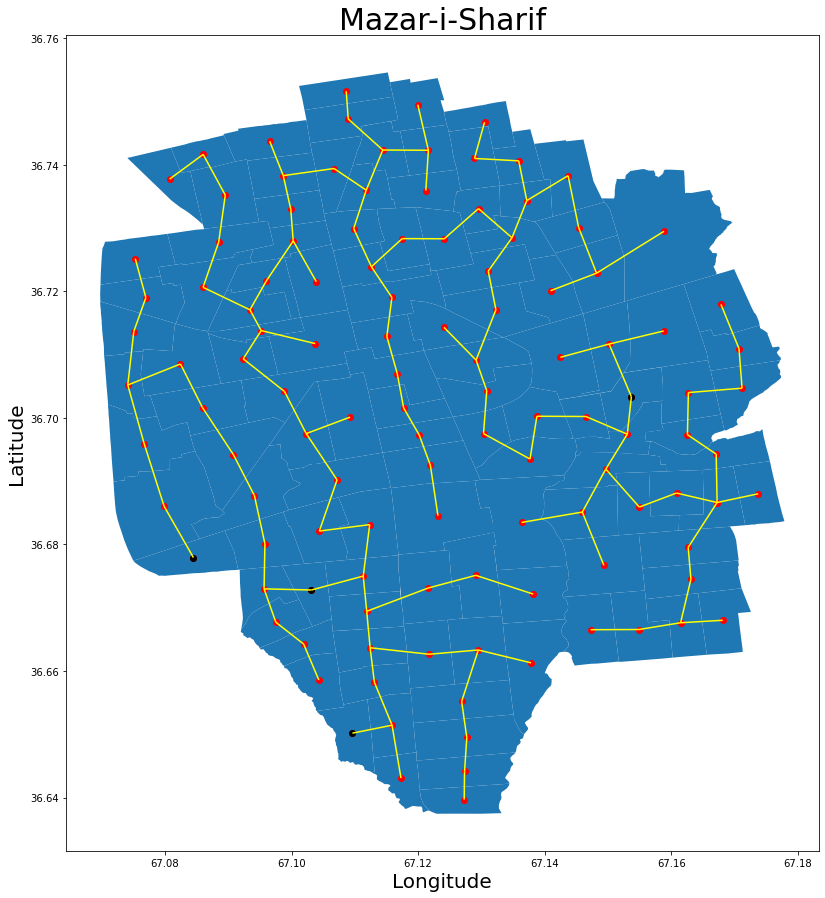

In [34]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'red', ax=ax)
Garage_locations.centroid.plot(color = 'black', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([Gozar_Boundary.centroid[e[0]],Gozar_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='yellow')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [35]:
edges = []
calced_edges = []

district_weights = getWeights(True, len(Gozar_Boundary.centroid))
for i in range(len(Gozar_Boundary.centroid)):
    for j in range(len(Gozar_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            dist = math.sqrt((Gozar_Boundary.centroid[i].x - Gozar_Boundary.centroid[j].x)**2 + (Gozar_Boundary.centroid[i].y - Gozar_Boundary.centroid[j].y)**2)/(district_weights[i]+district_weights[j]) 
            edges.append([i,j, dist])

In [36]:
#edges

g = Graph(len(Gozar_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

g.result

Edges in the constructed MST
2 -- 101 == 0.002399
7 -- 62 == 0.002515
48 -- 114 == 0.002624
2 -- 100 == 0.002736
16 -- 21 == 0.002838
17 -- 18 == 0.003082
90 -- 91 == 0.003142
91 -- 92 == 0.003150
23 -- 24 == 0.003195
102 -- 103 == 0.003235
53 -- 54 == 0.003248
42 -- 112 == 0.003288
54 -- 57 == 0.003304
79 -- 80 == 0.003325
46 -- 47 == 0.003388
90 -- 113 == 0.003436
23 -- 25 == 0.003449
112 -- 113 == 0.003492
62 -- 63 == 0.003517
99 -- 100 == 0.003560
41 -- 46 == 0.003595
33 -- 34 == 0.003630
51 -- 53 == 0.003709
26 -- 27 == 0.003771
84 -- 117 == 0.003777
41 -- 42 == 0.003875
82 -- 83 == 0.003936
85 -- 89 == 0.003954
92 -- 93 == 0.003968
83 -- 117 == 0.003995
52 -- 116 == 0.003999
7 -- 115 == 0.004037
21 -- 25 == 0.004045
22 -- 25 == 0.004045
52 -- 55 == 0.004072
55 -- 56 == 0.004087
4 -- 38 == 0.004106
80 -- 87 == 0.004127
46 -- 50 == 0.004133
37 -- 38 == 0.004138
37 -- 110 == 0.004166
5 -- 49 == 0.004171
68 -- 72 == 0.004176
15 -- 16 == 0.004267
17 -- 19 == 0.004281
81 -- 82 == 0.004

[[2, 101, 0.0023987448179495774],
 [7, 62, 0.0025145333965306484],
 [48, 114, 0.0026241077619311255],
 [2, 100, 0.0027361811345233498],
 [16, 21, 0.002837996005287265],
 [17, 18, 0.0030823041173988607],
 [90, 91, 0.0031417939168846016],
 [91, 92, 0.0031499014511337173],
 [23, 24, 0.003194912421389117],
 [102, 103, 0.0032352687456123127],
 [53, 54, 0.0032475424467295557],
 [42, 112, 0.003287602522842623],
 [54, 57, 0.003304128360393809],
 [79, 80, 0.003325440668917294],
 [46, 47, 0.0033883019544128294],
 [90, 113, 0.003435855045093227],
 [23, 25, 0.003448554797571208],
 [112, 113, 0.0034918873478512486],
 [62, 63, 0.003517251095397668],
 [99, 100, 0.0035597171821127355],
 [41, 46, 0.0035949223425995472],
 [33, 34, 0.0036304307091194385],
 [51, 53, 0.003708576503167169],
 [26, 27, 0.0037709133050374067],
 [84, 117, 0.0037773045387494916],
 [41, 42, 0.003875051853710646],
 [82, 83, 0.003936261830658796],
 [85, 89, 0.003953581932224784],
 [92, 93, 0.00396830368164335],
 [83, 117, 0.0039947

Text(0.5, 114.0, 'Longitude')

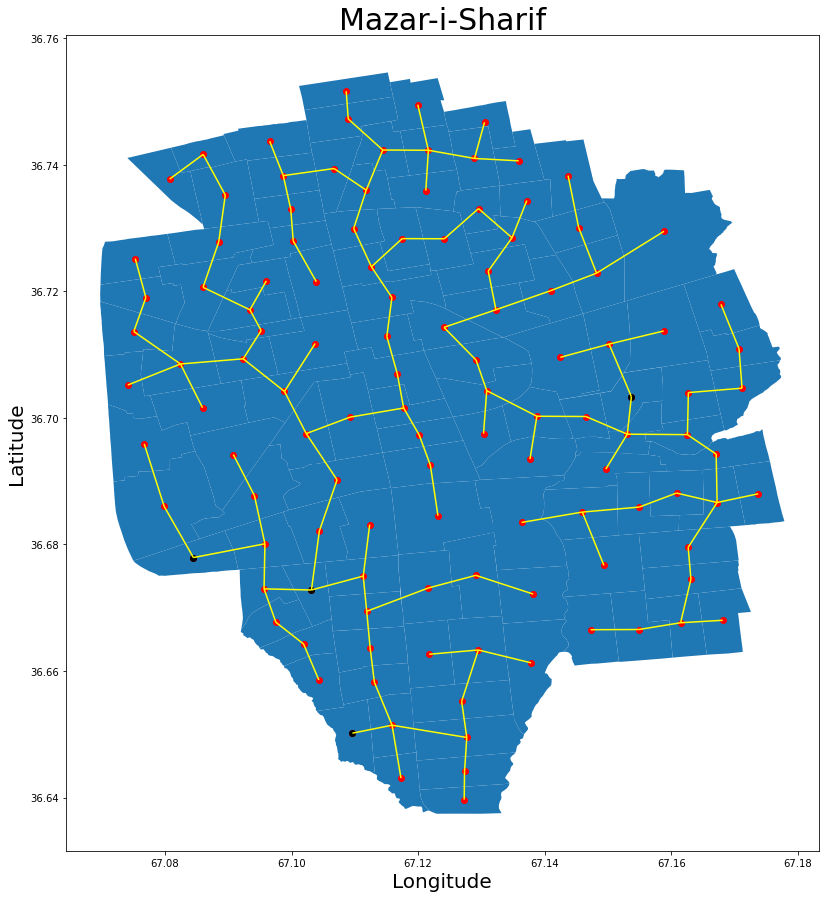

In [37]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'red', ax=ax)
Garage_locations.centroid.plot(color = 'black', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([Gozar_Boundary.centroid[e[0]],Gozar_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='yellow')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [38]:
edges = []
calced_edges = []

district_weights = getWeights(True, len(Gozar_Boundary.centroid))

garage_weight = 0.6

for i in range(len(Gozar_Boundary.centroid)):
    for j in range(len(Gozar_Boundary.centroid)):
        if (not((i,j) in calced_edges) and not((j,i) in calced_edges) and (i != j)):
            calced_edges.append((i,j))
            if(i in Garage_locations.index.to_list()) or (j in Garage_locations.index.to_list()):
                dist = math.sqrt((Gozar_Boundary.centroid[i].x - Gozar_Boundary.centroid[j].x)**2 + (Gozar_Boundary.centroid[i].y - Gozar_Boundary.centroid[j].y)**2)*garage_weight
            else:
                dist = math.sqrt((Gozar_Boundary.centroid[i].x - Gozar_Boundary.centroid[j].x)**2 + (Gozar_Boundary.centroid[i].y - Gozar_Boundary.centroid[j].y)**2)*(district_weights[i]+district_weights[j]) 
            edges.append([i,j, dist])

In [39]:
#edges

g = Graph(len(Gozar_Boundary.centroid))
for e in edges:
    g.addEdge(e[0], e[1], e[2])

g.KruskalMST()

g.result

Edges in the constructed MST
17 -- 18 == 0.003577
85 -- 89 == 0.003835
81 -- 82 == 0.004494
81 -- 83 == 0.004555
18 -- 19 == 0.004709
79 -- 81 == 0.005087
81 -- 117 == 0.005177
85 -- 86 == 0.005254
15 -- 18 == 0.005418
10 -- 18 == 0.005420
26 -- 27 == 0.005482
0 -- 75 == 0.005599
80 -- 81 == 0.005617
77 -- 81 == 0.005639
84 -- 85 == 0.005965
90 -- 91 == 0.006062
86 -- 87 == 0.006218
78 -- 81 == 0.006219
85 -- 88 == 0.006275
48 -- 114 == 0.006316
7 -- 62 == 0.006342
54 -- 57 == 0.006358
16 -- 18 == 0.006418
90 -- 113 == 0.006423
7 -- 115 == 0.006717
91 -- 92 == 0.006810
75 -- 78 == 0.006906
11 -- 18 == 0.006942
92 -- 93 == 0.007106
59 -- 64 == 0.007153
18 -- 20 == 0.007285
2 -- 101 == 0.007630
80 -- 87 == 0.007631
9 -- 18 == 0.007701
112 -- 113 == 0.007780
99 -- 100 == 0.007902
2 -- 100 == 0.008024
13 -- 14 == 0.008183
43 -- 44 == 0.008193
57 -- 115 == 0.008223
74 -- 75 == 0.008251
76 -- 81 == 0.008302
33 -- 34 == 0.008502
4 -- 38 == 0.008534
34 -- 109 == 0.008561
22 -- 25 == 0.008567
6

[[17, 18, 0.0035774389476705957],
 [85, 89, 0.0038351492217175626],
 [81, 82, 0.0044935406174813715],
 [81, 83, 0.004555130906375974],
 [18, 19, 0.004708788339743399],
 [79, 81, 0.005087291972920463],
 [81, 117, 0.005176819325193364],
 [85, 86, 0.005254103722096788],
 [15, 18, 0.005417991230803991],
 [10, 18, 0.005420037530075861],
 [26, 27, 0.0054819552560830395],
 [0, 75, 0.005598798549983241],
 [80, 81, 0.005616969040155715],
 [77, 81, 0.005638766040136606],
 [84, 85, 0.005964646686208045],
 [90, 91, 0.006062194039923003],
 [86, 87, 0.006218018243606342],
 [78, 81, 0.006218773287486353],
 [85, 88, 0.006275332757083185],
 [48, 114, 0.006315610772357378],
 [7, 62, 0.0063416660631712505],
 [54, 57, 0.006358416930214793],
 [16, 18, 0.006418353387626729],
 [90, 113, 0.006422816845736178],
 [7, 115, 0.006716918356209284],
 [91, 92, 0.006809660042862305],
 [75, 78, 0.0069056538631050044],
 [11, 18, 0.006941510381161482],
 [92, 93, 0.007105706304580985],
 [59, 64, 0.007152839126833406],
 [1

Text(0.5, 114.0, 'Longitude')

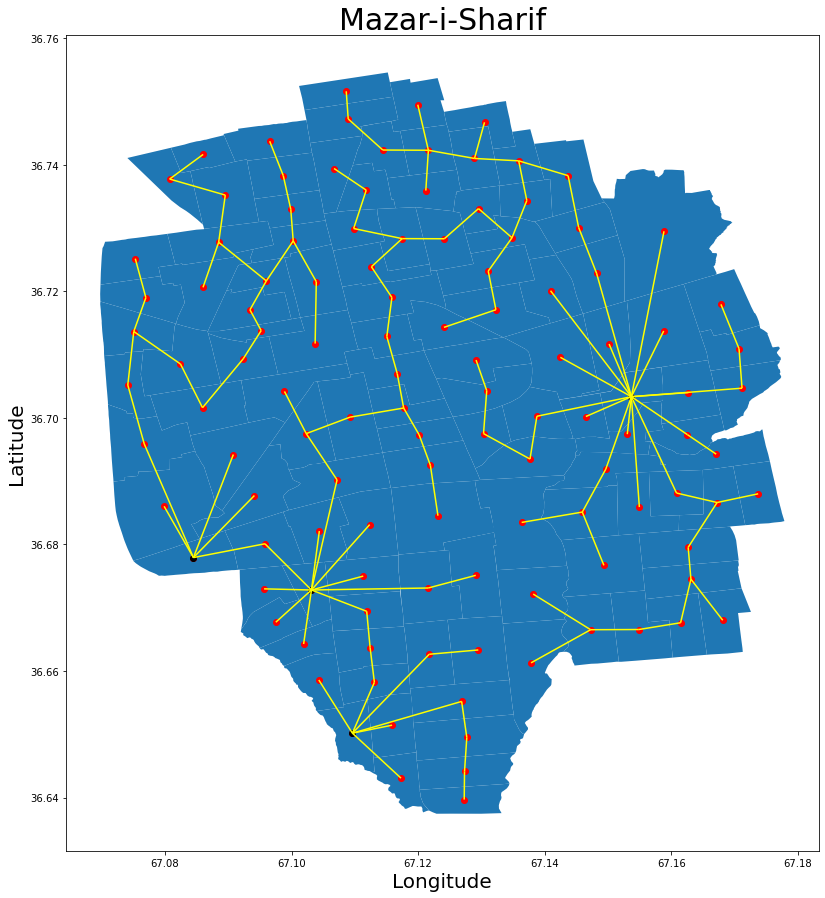

In [40]:
fig, ax = plt.subplots(figsize = (15,15))
Gozar_Boundary.plot(ax=ax)
Gozar_Boundary.centroid.plot(color = 'red', ax=ax)
Garage_locations.centroid.plot(color = 'black', ax=ax)


from shapely.geometry import LineString

lines = []
for e in g.result:
    l = LineString([Gozar_Boundary.centroid[e[0]],Gozar_Boundary.centroid[e[1]]])
    lines.append(l)
    
s = gpd.GeoSeries(lines)
s.plot(ax=ax, color='yellow')


ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})